Importing relevent liberies

In [1]:
!pip install kneed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings, re
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, BisectingKMeans, OPTICS
from sklearn.neighbors import NearestNeighbors
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from kneed import KneeLocator
from tqdm.notebook import tqdm
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture

In [4]:
st = pd.read_csv('/content/students_social_network.csv')
st.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0


Data Exploration

In [5]:
st.shape

(15000, 40)

In [6]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gradyear         15000 non-null  int64 
 1   gender           13663 non-null  object
 2   age              12504 non-null  object
 3   NumberOffriends  15000 non-null  int64 
 4   basketball       15000 non-null  int64 
 5   football         15000 non-null  int64 
 6   soccer           15000 non-null  int64 
 7   softball         15000 non-null  int64 
 8   volleyball       15000 non-null  int64 
 9   swimming         15000 non-null  int64 
 10  cheerleading     15000 non-null  int64 
 11  baseball         15000 non-null  int64 
 12  tennis           15000 non-null  int64 
 13  sports           15000 non-null  int64 
 14  cute             15000 non-null  int64 
 15  sex              15000 non-null  int64 
 16  sexy             15000 non-null  int64 
 17  hot              15000 non-null

In [7]:
st.describe()

,gradyear,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,2007.496933,29.834533,0.267000,0.255467,0.22200,0.159667,0.142933,0.135000,0.105133,0.104133,...,0.112867,0.259467,0.357267,0.150267,0.071800,0.051467,0.185867,0.118067,0.091733,0.061067
std,1.116516,35.386649,0.788851,0.702260,0.92042,0.737344,0.638747,0.548691,0.502491,0.519205,...,2.708619,0.704398,0.728512,0.478716,0.356258,0.280755,0.609928,0.455200,0.420631,0.349112
min,2006.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,20.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,44.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,605.000000,22.000000,9.000000,22.00000,17.000000,14.000000,31.000000,8.000000,14.000000,...,327.000000,12.000000,11.000000,8.000000,8.000000,8.000000,16.000000,14.000000,8.000000,16.000000


In [8]:
st.isnull().sum()

,0
gradyear,0
gender,1337
age,2496
NumberOffriends,0
basketball,0
football,0
soccer,0
softball,0
volleyball,0
swimming,0


In [9]:
st.duplicated().sum()

np.int64(266)

In [13]:
st = st.drop_duplicates()
st.shape

(14734, 40)

## Data Preprocessing

In [14]:
st.gender.value_counts()

,count
gender,
F,11001
M,2593


In [16]:
st.gender.fillna(st.gender.mode()[0],inplace = True)
print(st.gender.value_counts())

gender
F    12141
M     2593
Name: count, dtype: int64


In [17]:
st.age.value_counts()

,count
age,
16. Jun,24
16.591,20
17.399,20
17.443,20
16.764,19
...,...
20.43,1
15.107,1
20.704,1


In [18]:
st.age = st.age.astype(str).apply(lambda x: re.sub(r'[A-Za-z]+','',x)).str.strip()

In [19]:
st.age = pd.to_numeric(st.age, errors='coerce')

In [45]:
encoded_gender_data = pd.get_dummies(st.gender,prefix='gender',prefix_sep='_',dtype=np.int64,drop_first=True,sparse=False)
st = pd.concat([st,encoded_gender_data],axis=1)
st.drop('gender',axis=1,inplace=True)
st.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14734 entries, 0 to 14999
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gradyear         14734 non-null  int64  
 1   age              14734 non-null  float64
 2   NumberOffriends  14734 non-null  int64  
 3   basketball       14734 non-null  int64  
 4   football         14734 non-null  int64  
 5   soccer           14734 non-null  int64  
 6   softball         14734 non-null  int64  
 7   volleyball       14734 non-null  int64  
 8   swimming         14734 non-null  int64  
 9   cheerleading     14734 non-null  int64  
 10  baseball         14734 non-null  int64  
 11  tennis           14734 non-null  int64  
 12  sports           14734 non-null  int64  
 13  cute             14734 non-null  int64  
 14  sex              14734 non-null  int64  
 15  sexy             14734 non-null  int64  
 16  hot              14734 non-null  int64  
 17  kissed           

In [46]:
st.isna().sum()

,0
gradyear,0
age,0
NumberOffriends,0
basketball,0
football,0
soccer,0
softball,0
volleyball,0
swimming,0
cheerleading,0


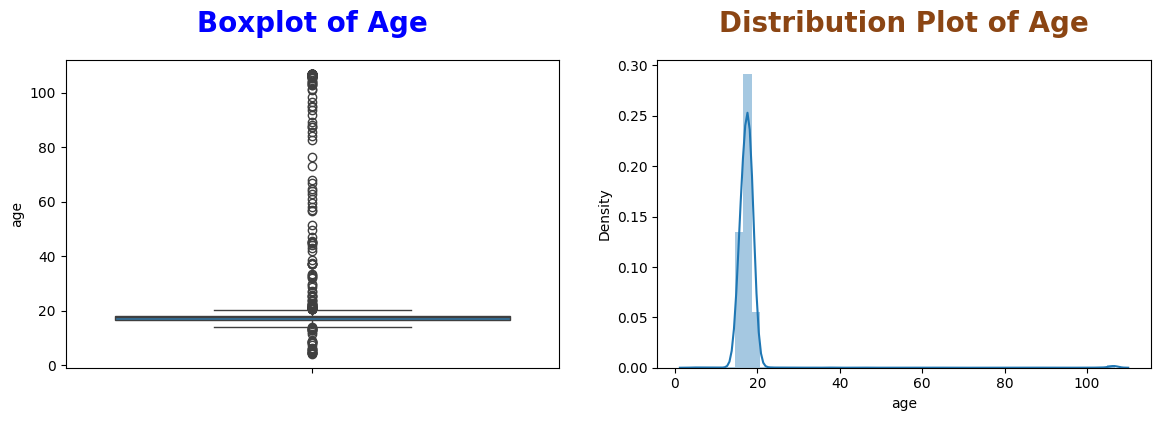

In [47]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.boxplot(st.age)
plt.title('Boxplot of Age', fontsize=20, pad=20, fontweight='bold', color='Blue')

plt.subplot(122)
sns.distplot(st.age)
plt.title('Distribution Plot of Age', fontsize=20, pad=20, fontweight='bold', color='saddlebrown')
plt.show();

In [48]:
imputer = IterativeImputer()
st.age = imputer.fit_transform(st[['age']])

In [41]:
st.age.isna().sum()

np.int64(0)

## Scaling data using Standard Scaler

In [49]:
X = st.copy()

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(st)

In [51]:
X_scaled = pd.DataFrame(X_scaled,columns= st.columns)
X_scaled.head()

,gradyear,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,gender_M,gender_M
0,-0.450488,5.045319e-16,-0.855595,-0.341797,-0.367498,-0.243498,-0.218589,-0.225892,-0.248395,-0.211195,...,-0.495908,-0.317009,-0.203432,-0.185025,-0.307742,-0.261872,-0.220147,-0.176547,-0.46214,-0.46214
1,-0.450488,-7.921792e-02,0.525365,-0.341797,-0.367498,0.833889,-0.218589,-0.225892,1.558941,-0.211195,...,-0.495908,-0.317009,-0.203432,-0.185025,-0.307742,-0.261872,2.137153,-0.176547,-0.46214,-0.46214
2,-0.450488,-6.487460e-02,0.299902,-0.341797,-0.367498,-0.243498,-0.218589,-0.225892,-0.248395,-0.211195,...,-0.495908,-0.317009,-0.203432,-0.185025,-0.307742,-0.261872,2.137153,2.663234,-0.46214,-0.46214
3,-1.346720,5.045319e-16,0.158988,-0.341797,-0.367498,-0.243498,-0.218589,-0.225892,-0.248395,-0.211195,...,-0.495908,-0.317009,-0.203432,-0.185025,-0.307742,-0.261872,-0.220147,-0.176547,-0.46214,-0.46214
4,0.445744,-1.861538e-01,-0.827412,-0.341797,-0.367498,-0.243498,-0.218589,-0.225892,1.558941,-0.211195,...,-0.495908,5.899686,-0.203432,-0.185025,-0.307742,-0.261872,-0.220147,-0.176547,-0.46214,-0.46214


In [52]:
X_scaled.isna().sum()

,0
gradyear,0
age,0
NumberOffriends,0
basketball,0
football,0
soccer,0
softball,0
volleyball,0
swimming,0
cheerleading,0


# PCA - Dimensionality Reduction

In [53]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [54]:
X_pca = pca.transform(X_scaled)

**K Means Clustering**

In [55]:
ssd = []
kmeans_silhouette_scores = []

for i in tqdm(range(2,21)):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)
    kmeans_labels = kmeans.predict(X_scaled)
    kmeans_silhouette = silhouette_score(X_scaled,kmeans_labels)
    kmeans_silhouette_scores.append(kmeans_silhouette)

  0%|          | 0/19 [00:00<?, ?it/s]

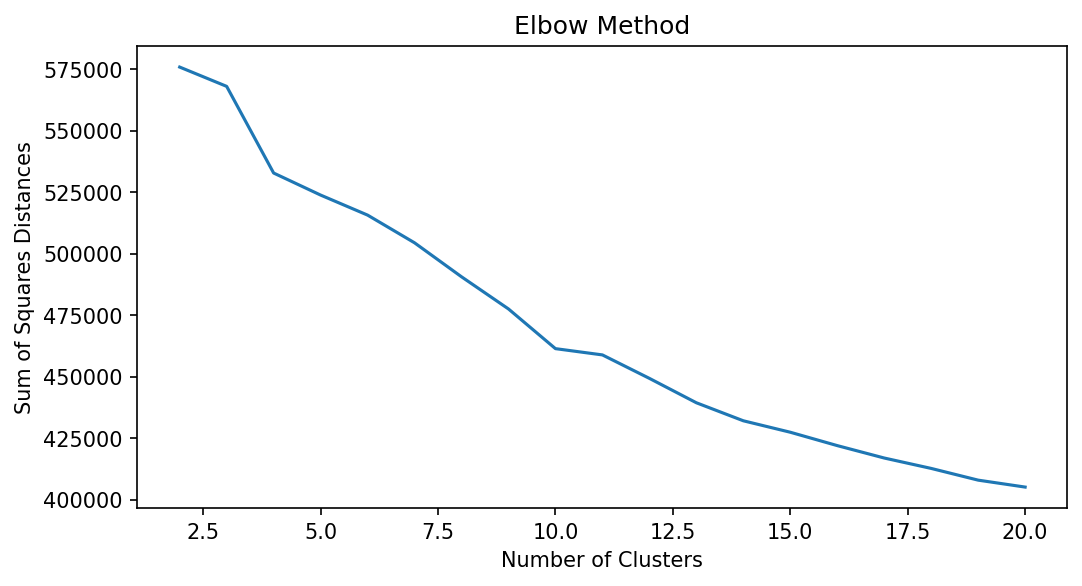

In [56]:
plt.figure(figsize=(8,4),dpi=150)
plt.plot(np.arange(2,21),ssd)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squares Distances')
plt.title('Elbow Method')
plt.show();

In [57]:
# Locate the knee point for optimal number of clusters
knee_kmeans = KneeLocator(x=np.arange(2,21),y=kmeans_silhouette_scores,curve='convex',direction='decreasing')
optimal_k = knee_kmeans.knee
optimal_k

np.int64(4)

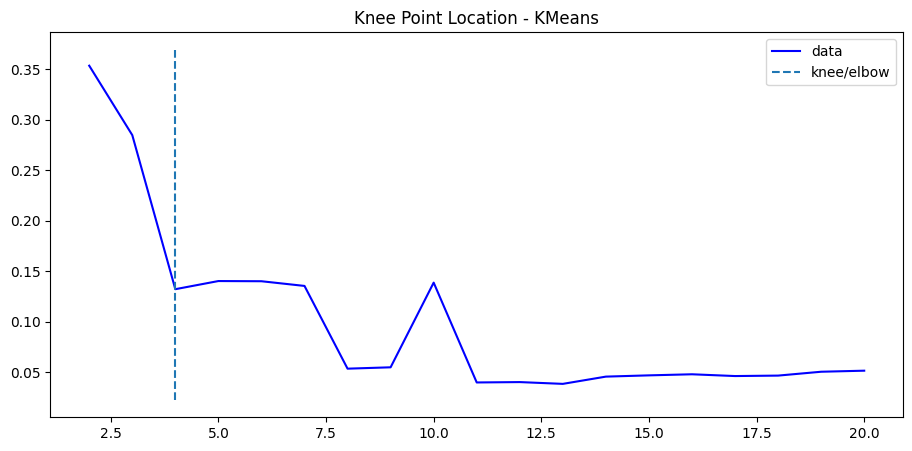

In [58]:
knee_kmeans.plot_knee(figsize=(11,5),title='Knee Point Location - KMeans')
plt.show();

In [59]:
# Fit KMeans with optimal number of clusters
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_model.fit(X_scaled)

KMeans(n_clusters=np.int64(4), random_state=42)

In [60]:
X['kmeans_cluster'] = kmeans_model.labels_
kmeans_silhouette = silhouette_score(X_scaled,X['kmeans_cluster'])
kmeans_davies_bouldin = davies_bouldin_score(X_scaled,X['kmeans_cluster'])
kmeans_calinski_harabasz = calinski_harabasz_score(X_scaled,X['kmeans_cluster'])

print(f"Silhouette Score: {kmeans_silhouette:.2f}")
print(f"Davies-Bouldin Score: {kmeans_davies_bouldin:.2f}")
print(f"Calinski-Harabasz Score: {kmeans_calinski_harabasz:.2f}")

Silhouette Score: 0.13
Davies-Bouldin Score: 3.47
Calinski-Harabasz Score: 656.64


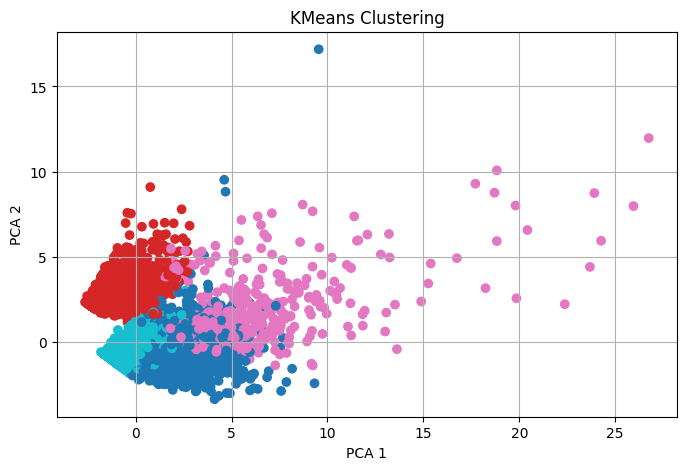

In [61]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['kmeans_cluster'], cmap='tab10')
plt.title('KMeans Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show();

**Agglomerative Clustering**

In [62]:
agglo_silhouette_scores = []

for i in tqdm(range(2,21)):
    agglo = AgglomerativeClustering(n_clusters=i)
    agglo_labels = agglo.fit_predict(X_scaled)
    agglo_silhouette_scores.append(silhouette_score(X_scaled,agglo_labels))

  0%|          | 0/19 [00:00<?, ?it/s]

In [63]:
knee_agglo = KneeLocator(x=range(2,21),y=agglo_silhouette_scores,curve='convex',direction='decreasing',S=1.0,interp_method='polynomial',polynomial_degree=7)
optimal_k = knee_agglo.knee
optimal_k

np.int64(2)

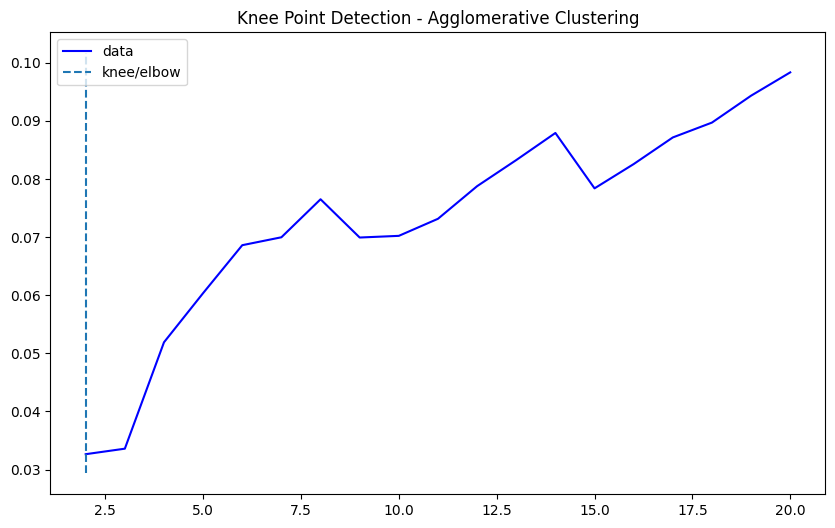

In [64]:
knee_agglo.plot_knee(figsize=(10,6),title='Knee Point Detection - Agglomerative Clustering')
plt.show();

In [65]:
agglo_model = AgglomerativeClustering(n_clusters=optimal_k)
agglo_model.fit(X_scaled)

AgglomerativeClustering(n_clusters=np.int64(2))

In [66]:
X['agglo_cluster'] = agglo_model.fit_predict(X_scaled)
agglo_silhouette_score = silhouette_score(X_scaled,X['agglo_cluster'])
agglo_davies_bouldin_score = davies_bouldin_score(X_scaled,X['agglo_cluster'])
agglo_calinski_harabasz_score = calinski_harabasz_score(X_scaled,X['agglo_cluster'])
print(f"Silhouette Score: {agglo_silhouette_score:.2f}")
print(f"Davies-Bouldin Score: {agglo_davies_bouldin_score:.2f}")
print(f"Calinski-Harabasz Score: {agglo_calinski_harabasz_score:.2f}")

Silhouette Score: 0.03
Davies-Bouldin Score: 2.33
Calinski-Harabasz Score: 662.93


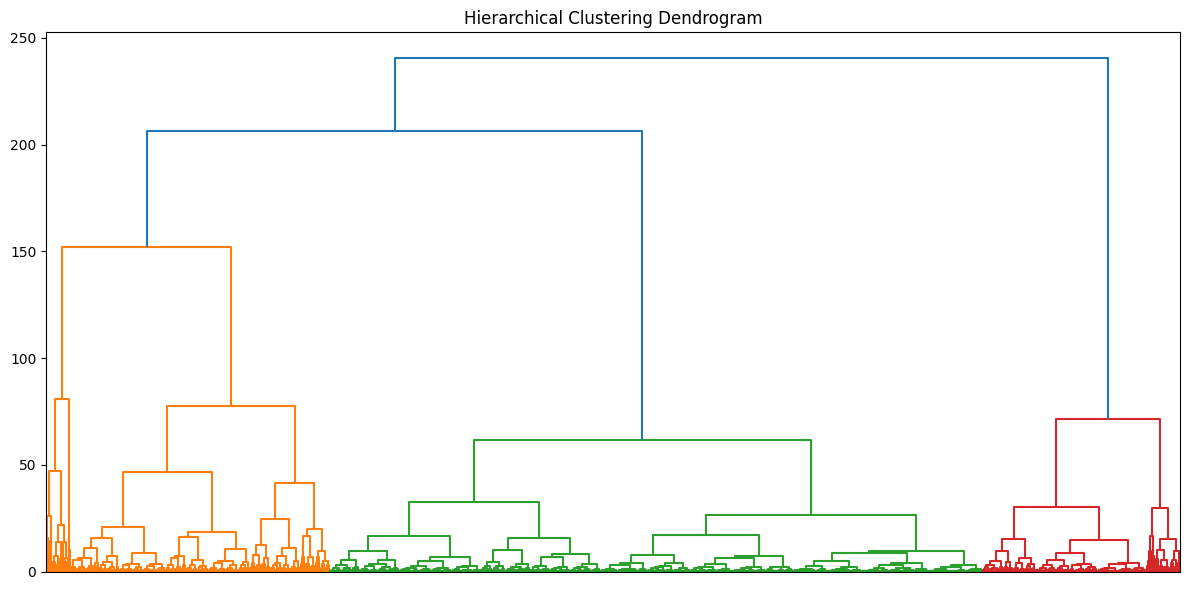

In [67]:
linked = linkage(X_pca, 'ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=20, no_labels=True, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.tight_layout()
plt.show();

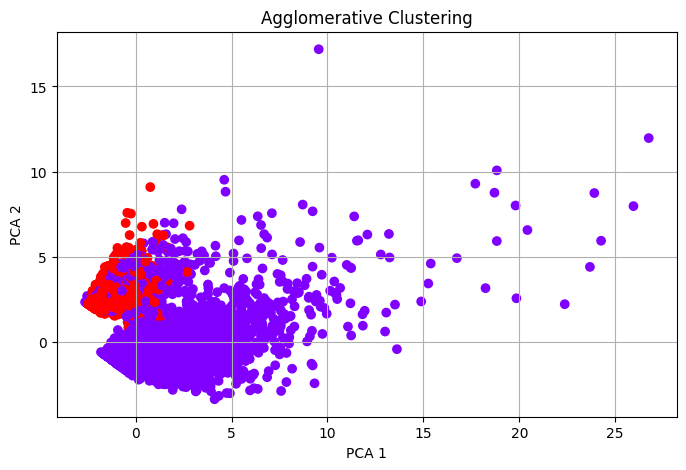

In [68]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['agglo_cluster'], cmap='rainbow')
plt.title('Agglomerative Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show();

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

In [69]:
k = 10
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
distances = np.sort(distances[:,k-1])

In [70]:
knee_dbscan = KneeLocator(x=range(len(distances)),y=distances,curve='convex',direction='increasing')
optimal_eps = distances[knee_dbscan.knee]

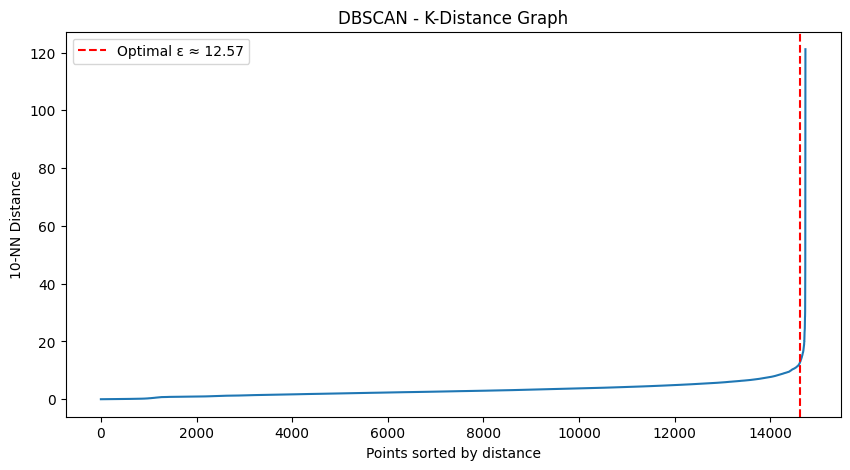

In [71]:
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.axvline(knee_dbscan.knee, color='red', linestyle='--', label=f'Optimal ε ≈ {optimal_eps:.2f}')
plt.title("DBSCAN - K-Distance Graph")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{k}-NN Distance")
plt.legend()
plt.show();

In [72]:
dbscan = DBSCAN(eps=optimal_eps,min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)
X['dbscan_cluster'] = dbscan_labels

In [73]:
dbscan_silhouette_score = silhouette_score(X_scaled,X['dbscan_cluster'])
dbscan_davies_bouldin_score = davies_bouldin_score(X_scaled,X['dbscan_cluster'])
dbscan_calinski_harabasz_score = calinski_harabasz_score(X_scaled,X['dbscan_cluster'])
print(f"Silhouette Score: {dbscan_silhouette_score:.2f}")
print(f"Davies-Bouldin Score: {dbscan_davies_bouldin_score:.2f}")
print(f"Calinski-Harabasz Score: {dbscan_calinski_harabasz_score:.2f}")

Silhouette Score: 0.75
Davies-Bouldin Score: 2.62
Calinski-Harabasz Score: 258.30


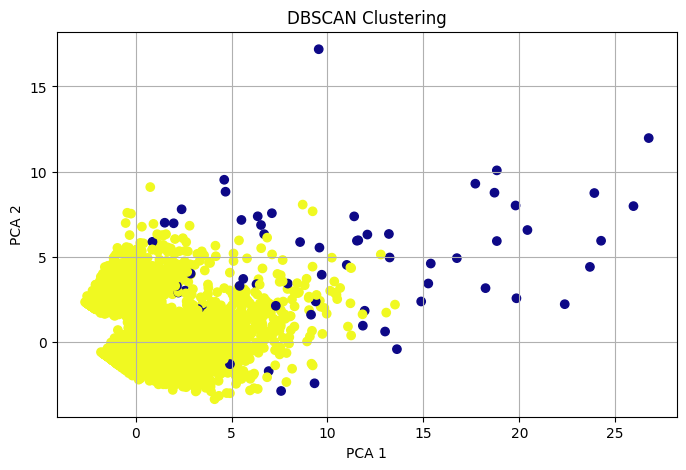

In [74]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['dbscan_cluster'], cmap='plasma')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show();

**Bisecting K Means Clustering**

In [75]:
bikmeans_silhouette_scores = []

for i in tqdm(range(2,21)):
    bikmeans = BisectingKMeans(n_clusters=i,random_state=42)
    bisecting_kmeans_labels = bikmeans.fit_predict(X_scaled)
    bikmeans_silhouette_score = silhouette_score(X_scaled,bisecting_kmeans_labels)
    bikmeans_silhouette_scores.append(bikmeans_silhouette_score)

  0%|          | 0/19 [00:00<?, ?it/s]

In [76]:
bikmeans_knee = KneeLocator(x=range(2,21),y=bikmeans_silhouette_scores,curve='convex',direction='decreasing')
optimal_k = bikmeans_knee.knee
optimal_k

np.int64(5)

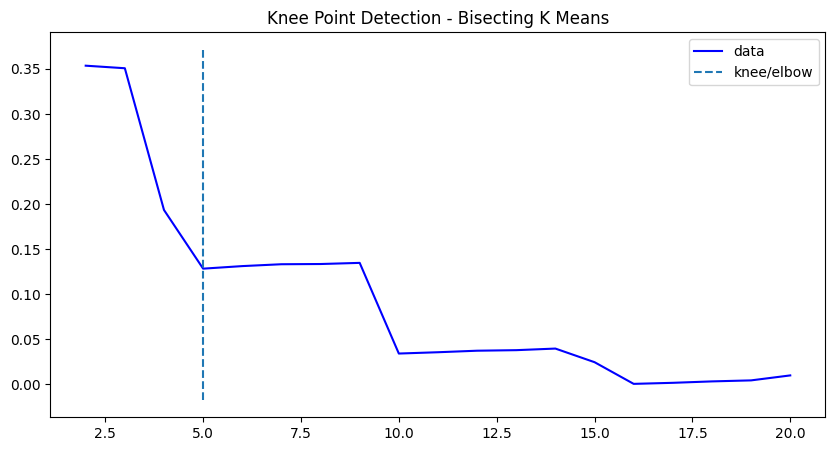

In [77]:
bikmeans_knee.plot_knee(figsize=(10,5),title='Knee Point Detection - Bisecting K Means')
plt.show();


In [78]:
bisecting_kmeans_model = BisectingKMeans(n_clusters=optimal_k,random_state=42)
bisecting_kmeans_labels = bisecting_kmeans_model.fit_predict(X_scaled)
X['bisecting_kmeans_cluster'] = bisecting_kmeans_labels

In [79]:
bisecting_kmeans_silhouette_score = silhouette_score(X_scaled,X['bisecting_kmeans_cluster'])
bisecting_kmeans_davies_bouldin_score = davies_bouldin_score(X_scaled,X['bisecting_kmeans_cluster'])
bisecting_kmeans_calinski_harabasz_score = calinski_harabasz_score(X_scaled,X['bisecting_kmeans_cluster'])
print(f"Silhouette Score: {bisecting_kmeans_silhouette_score:.2f}")
print(f"Davies-Bouldin Score: {bisecting_kmeans_davies_bouldin_score:.2f}")
print(f"Calinski-Harabasz Score: {bisecting_kmeans_calinski_harabasz_score:.2f}")

Silhouette Score: 0.13
Davies-Bouldin Score: 3.08
Calinski-Harabasz Score: 528.46


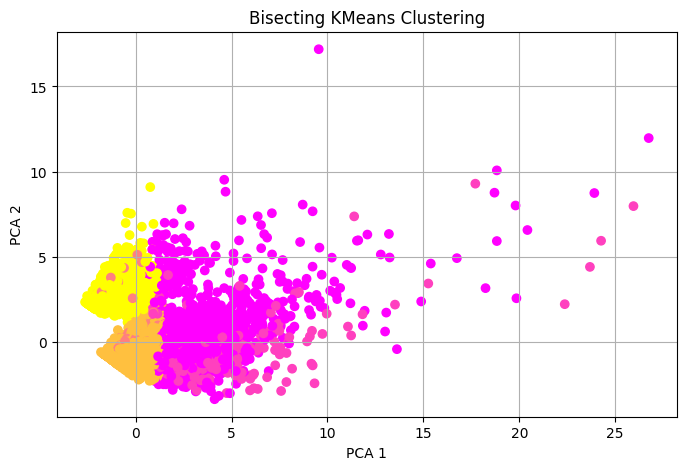

In [80]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['bisecting_kmeans_cluster'], cmap='spring')
plt.title('Bisecting KMeans Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show();

**OPTICS Clustering**

In [81]:
optics_model = OPTICS(min_samples=10, xi=0.05)
optics_labels = optics_model.fit_predict(X_scaled)
X['optics_cluster'] = optics_labels

In [82]:
optics_silhouette_score = silhouette_score(X_scaled,X['optics_cluster'])
optics_davies_bouldin_score = davies_bouldin_score(X_scaled,X['optics_cluster'])
optics_calinski_harabasz_score = calinski_harabasz_score(X_scaled,X['optics_cluster'])
print(f"Silhouette Score: {optics_silhouette_score:.2f}")
print(f"Davies-Bouldin Score: {optics_davies_bouldin_score:.2f}")
print(f"Calinski-Harabasz Score: {optics_calinski_harabasz_score:.2f}")

Silhouette Score: -0.38
Davies-Bouldin Score: 2.14
Calinski-Harabasz Score: 7.23


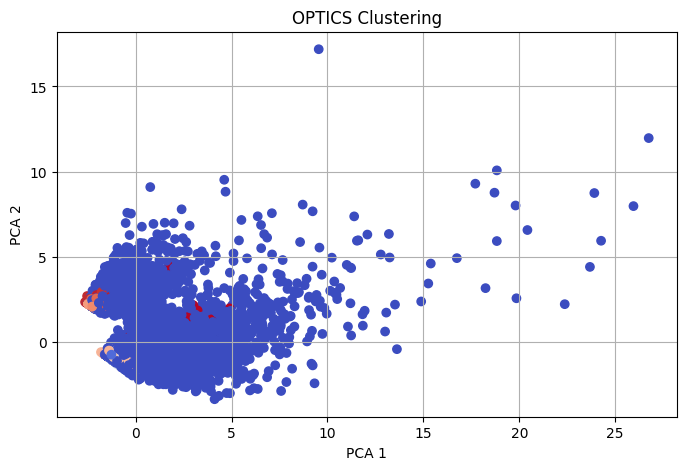

In [83]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['optics_cluster'], cmap='coolwarm')
plt.title('OPTICS Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show();

**Gaussian Mixture Models (GMM) Clustering**

In [84]:
bic = []

for i in tqdm(range(1,15)):
    gmm = GaussianMixture(n_components=i, random_state=42)
    gmm.fit(X_scaled)
    bic.append(gmm.bic(X_scaled))

  0%|          | 0/14 [00:00<?, ?it/s]

In [85]:
gmm_knee = KneeLocator(x=range(1,15), y=bic, curve='convex', direction='decreasing')
optimal_k = gmm_knee.knee
optimal_k

np.int64(5)

In [87]:
gmm_model = GaussianMixture(n_components=2,random_state=42)
gmm_labels = gmm_model.fit_predict(X_scaled)
X['gmm_cluster'] = gmm_labels
gmm_silhouette_score = silhouette_score(X_scaled,X['gmm_cluster'])
gmm_davies_bouldin_score = davies_bouldin_score(X_scaled,X['gmm_cluster'])
gmm_calinski_harabasz_score = calinski_harabasz_score(X_scaled,X['gmm_cluster'])
print(f"Silhouette Score: {gmm_silhouette_score:.2f}")
print(f"Davies-Bouldin Score: {gmm_davies_bouldin_score:.2f}")
print(f"Calinski-Harabasz Score: {gmm_calinski_harabasz_score:.2f}")

Silhouette Score: 0.31
Davies-Bouldin Score: 4.73
Calinski-Harabasz Score: 505.37


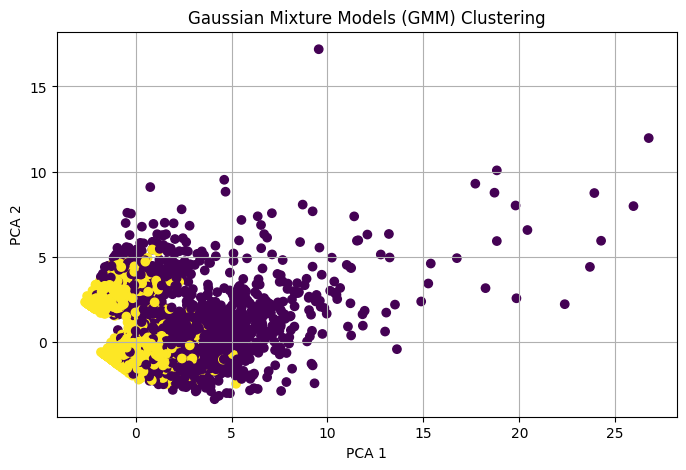

In [88]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['gmm_cluster'], cmap='viridis')
plt.title('Gaussian Mixture Models (GMM) Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show();

In [89]:
tsne = TSNE(n_components=2,perplexity=30,random_state=42)

tsne_results = tsne.fit_transform(X_pca)

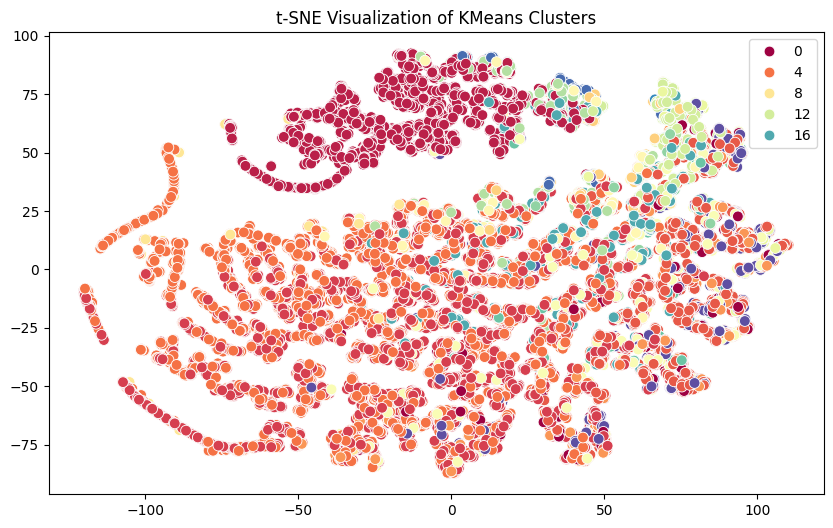

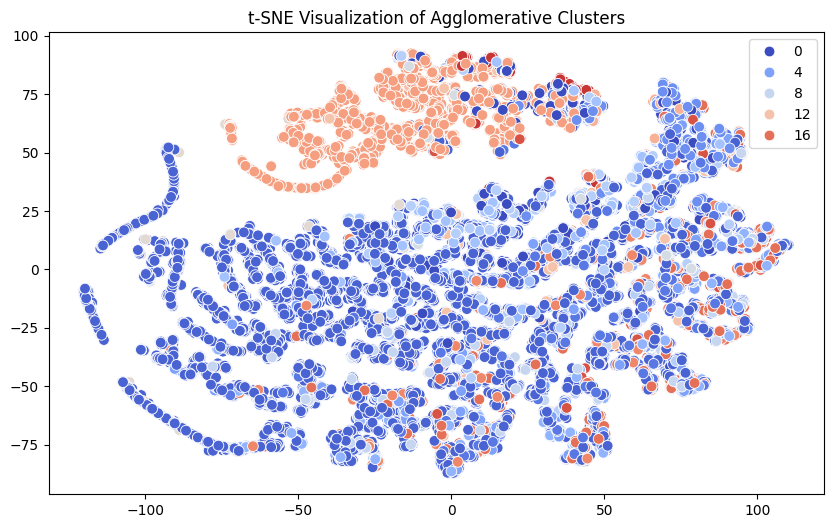

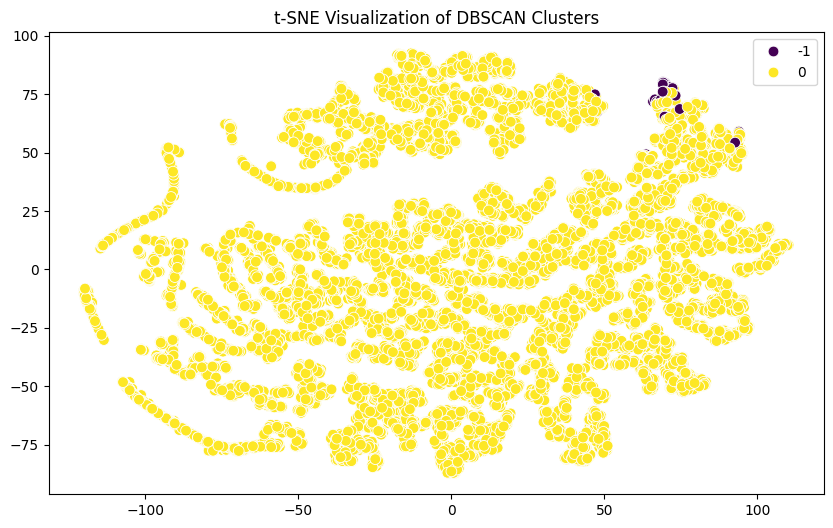

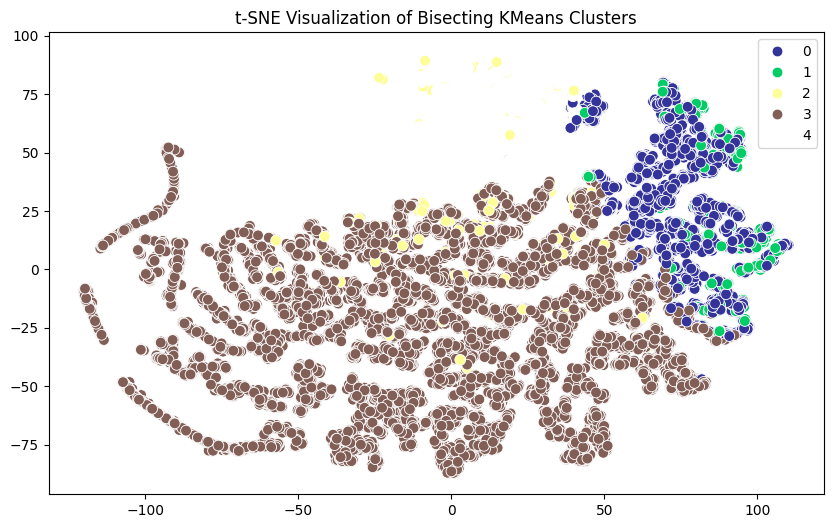

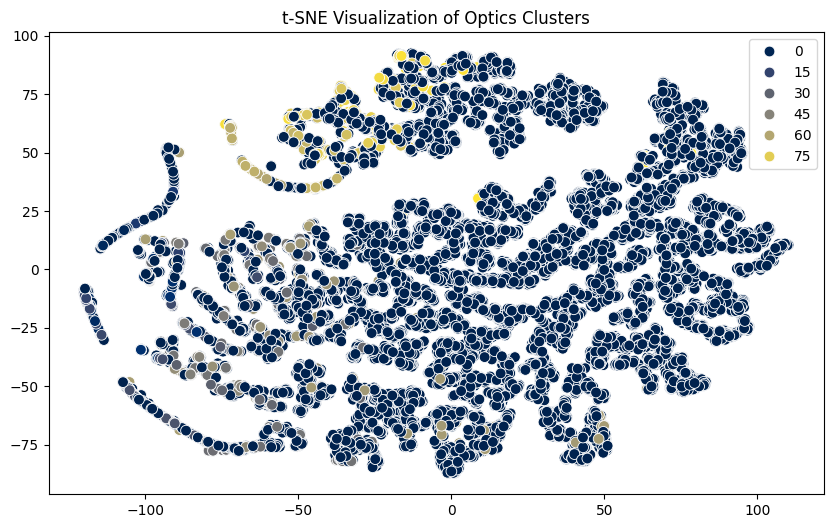

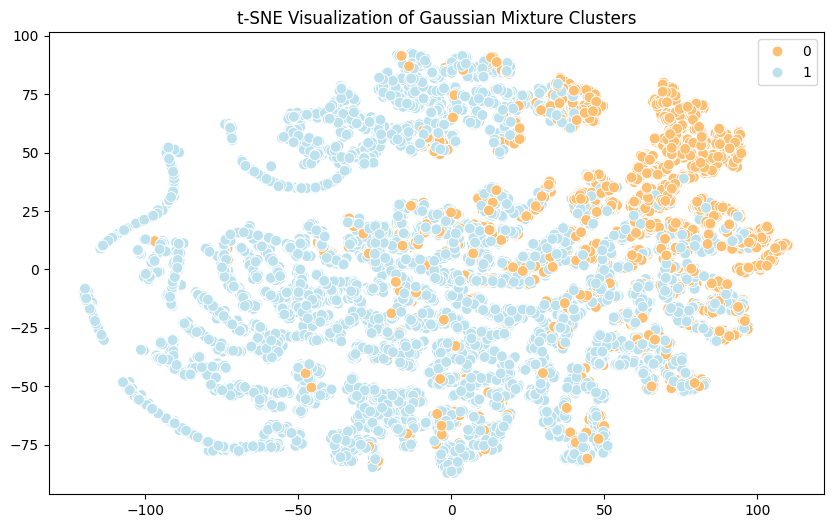

In [90]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=kmeans_labels, palette='Spectral', s=60)
plt.title("t-SNE Visualization of KMeans Clusters")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=agglo_labels, palette='coolwarm', s=60)
plt.title("t-SNE Visualization of Agglomerative Clusters")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=dbscan_labels, palette='viridis', s=60)
plt.title("t-SNE Visualization of DBSCAN Clusters")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=bisecting_kmeans_labels, palette='terrain', s=60)
plt.title("t-SNE Visualization of Bisecting KMeans Clusters")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=optics_labels, palette='cividis', s=60)
plt.title("t-SNE Visualization of Optics Clusters")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=gmm_labels, palette='RdYlBu', s=60)
plt.title("t-SNE Visualization of Gaussian Mixture Clusters")
plt.show()